# Solution to Exercise 1 (Oct. 28, 2021)

---
# Line fitting

In [1]:
# Importing numpy for calculations and matplotlib for plotting
import numpy as np
import matplotlib.pyplot as plt

In the following exercises, you will perform curve fitting exercises of increasing complexity. Curve fitting, so finding mathematical model parameters that best describe given data, represents an inverse problem. While several implementations for regression problems are available in Python libraries such as Numpy's [polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) or [linear algebra solver](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve), please solve the exercises by calculating the appropriate generalized inverse as introduced in the lecture. 

For this, you will need to perform [matrix inversions](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html?highlight=inv#numpy.linalg.inv), [matrix transposes](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.T.html#numpy.ndarray.T), as well as matrix-matrix and matrix-vector [multiplications](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html?highlight=matmul#numpy.matmul). Note that the matrix-multiplication function `C = np.matmul(A,B)` can also be performed by the `@`-operator, e.g. `C = A @ B`. Using the multiplication sign (`*`) on two matrices will not return their product, but will perform element-wise multiplication instead. You can also multiply an array with a scalar to multiply each individual element by that value.

# 1. Linear Models

## 1.1 Fitting a linear model with few observations

Assume we have two measurements $d_1$ and $d_2$, that were taken from a linear process that can be described by $d(x) = a \cdot x + b$:

$d_1 = 13$ and $d_2 = 7$, taken at $x_1 = 10$ and $x_2 = 15$

(a) Create vectors for data and x-values, and visualize the two datapoints in a [scatterplot](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.scatter.html):

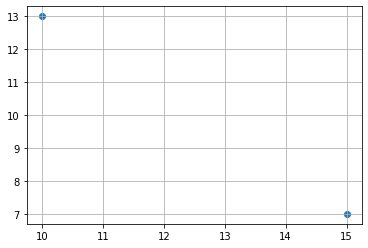

In [2]:
d = 13, 7
x = 10, 15

fig, ax = plt.subplots()
ax.scatter(x,d)
ax.grid()

(b) Which type of problem is posed here? What are the auxiliary variables of this problem? Which solution is appropriate to solve the inverse problem?

**Answer**: Even-determined, since the linear model has two parameters and we have two observations, i.e. we have an even number of paramters and observations ($M = N$). A solution is obtained by matrix inversion, i.e. $\mathbf{m_\text{est}} = \mathbf{G^{-1}} \mathbf{d}$.

(c) What are the dimensions of the $\mathbf{G}$ matrix? Write it down on paper first and then construct it into a numpy array.

In [3]:
G = np.array((x, np.ones(len(x)))).T
G

array([[10.,  1.],
       [15.,  1.]])

(d) Using the appropriate solution from question (b), estimate the model parameters $a$ and $b$ given the observations.

In [4]:
# The solution is obtained through 
Ginv = np.linalg.inv(G)
m_est = Ginv @ d
a = m_est[0]
b = m_est[1]

Check your solution for a and b by using them to get a data estimate at $x = 10$ and $x = 15$

In [5]:
d1_est = a*10 + b
d2_est = a*15 + b
d1_est, d2_est

(12.999999999999996, 6.9999999999999964)

(e) Visualize a range of model realizations from $x = -50$ to $x = 50$ and plot the original data against it. We can use Numpy's [linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) function to create an auxiliary variable x.

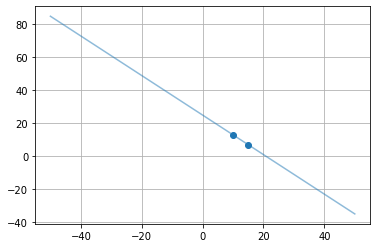

In [6]:
x_aux = np.linspace(-50, 50, 100) # Evenly-spaced x-variables (just for visualization)
d_est = a*x_aux + b

fig, ax = plt.subplots()
ax.plot(x_aux, d_est, alpha=0.5)
ax.scatter(x, d)
ax.grid()

## 1.2 Fitting a linear model with many observations

We have given 25 data points of a hypothetical measurement taken at 25 different positions $x$ of a similar linear process as in the previous task:

In [7]:
d1 = np.array([  7.93494028,  5.68739874,  2.6285696 , 12.21816911, 11.94169231,
                 4.13625885,  8.51225942,  5.62103488,  5.65592905, 22.08629139,
                12.44603838, 18.49236748, 17.7113576 , 17.360048  , 12.79941666,
                13.92529062, 22.1420152 , 26.53605093, 12.65966116, 18.11449018,
                22.75746405, 29.95185639, 28.37414316, 30.70226002, 28.8055315 ])

x1 = np.linspace(0,10,25)

(a) What type of problem is presented here? Which solution is appropriate to solve it?


**Answer**: Over-determined problem, since we still have two model parameters, but 25 observations now, so $N > M$. Over-determined problems can be solved using the method of least-squares.

(b) Explicitly write down $\mathbf{G}$ and create it as numpy array.

  $$\begin{bmatrix}d_1 \\ d_2 \\ \vdots \\ d_N \end{bmatrix} = \begin{bmatrix}x_1 & 1 \\ x_2 & 1 \\ \vdots & \vdots \\ x_N & 1 \end{bmatrix}\begin{bmatrix}a \\ b \end{bmatrix}$$

  $$\mathbf{d}\qquad = \qquad\mathbf{G}\qquad\qquad \underbrace{\mathbf{m}}_{M=2}$$

In [8]:
G1 = np.array((x1, np.ones(len(x1)))).T
G1

array([[ 0.        ,  1.        ],
       [ 0.41666667,  1.        ],
       [ 0.83333333,  1.        ],
       [ 1.25      ,  1.        ],
       [ 1.66666667,  1.        ],
       [ 2.08333333,  1.        ],
       [ 2.5       ,  1.        ],
       [ 2.91666667,  1.        ],
       [ 3.33333333,  1.        ],
       [ 3.75      ,  1.        ],
       [ 4.16666667,  1.        ],
       [ 4.58333333,  1.        ],
       [ 5.        ,  1.        ],
       [ 5.41666667,  1.        ],
       [ 5.83333333,  1.        ],
       [ 6.25      ,  1.        ],
       [ 6.66666667,  1.        ],
       [ 7.08333333,  1.        ],
       [ 7.5       ,  1.        ],
       [ 7.91666667,  1.        ],
       [ 8.33333333,  1.        ],
       [ 8.75      ,  1.        ],
       [ 9.16666667,  1.        ],
       [ 9.58333333,  1.        ],
       [10.        ,  1.        ]])

(c). Estimate the model parameters (and put this estimation in a function for later reuse).

Least-squares solution:
$$\mathbf{m}_\mathrm{est}=\left[\mathbf{G}^T\mathbf{G}\right]^{-1} \mathbf{G}^T\mathbf{d}$$

Since we will solve this problem multiple times, you could put this function (and others that you frequently use) into a `*.py` file, which you can import in other notebooks. This follows the important programming concept **DRY - Do not repeat yourself!**.

In [9]:
def least_squares(G, d):
    """ Calculate and return least-squares solution."""
    GtG = G.T @ G
    m_est = np.linalg.inv(GtG) @ G.T @ d
    print('m_est:', m_est)
    return m_est

m_est1 = least_squares(G1, d1)

m_est: [2.39545579 3.99074245]


(d) Visualize the measured data together with the predicted data $\mathbf{d}_\text{pre} = \mathbf{Gm}_\text{est}$ and again put this into a function for later reuse.

<AxesSubplot:xlabel='x (auxiliary variable)', ylabel='y(x) (data)'>

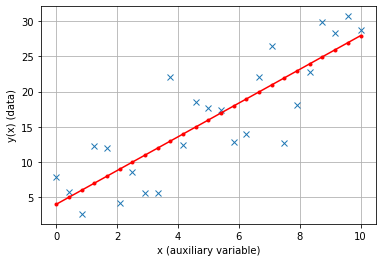

In [10]:
def plot(d, x, m_est, G):
    fig, ax = plt.subplots()
    ax.plot(x, d, 'x')
    d_pre = G @ m_est
    ax.plot(x, d_pre, '.-', color='r')
    ax.set_xlabel('x (auxiliary variable)')
    ax.set_ylabel('y(x) (data)')
    ax.grid()
    return ax

plot(d1, x1, m_est1, G1)

(e) Compute the RMS ("root mean square") error between the given observations and the model response, i.e. the predicted data.
$$RMSE = \sqrt{\frac{1}{N} \sum_{i=1}^N ( d^i - d^i_\mathrm{pre}))^2 }$$

Again, put this into a function.

In [11]:
def RMSE(d, d_pre):
    """ Calculate and return root-mean-square error."""
    RMSE = np.sqrt(1 / d.size * np.sum((d - d_pre) ** 2))
    return RMSE

RMSE(d1, G1 @ m_est1)

4.519031206976329